Shape (lignes, colonnes): (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2



Valeurs manquantes par colonne:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

KPIs:
- Total tips: 731.58
- Tip moyen: 3.00
- Addition moyenne: 19.79
- Nombre de transactions: 244


/tmp/ipython-input-1938675834.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_day = df.groupby("day", as_index=False).agg(


,day,total_bill_mean,tip_mean,n
3,Sun,21.410000,3.255132,76
2,Sat,20.441379,2.993103,87
0,Thur,17.682742,2.771452,62
1,Fri,17.151579,2.734737,19


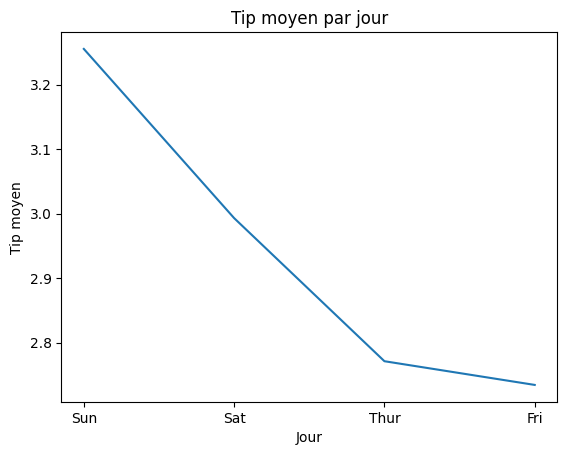

/tmp/ipython-input-1938675834.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_smoker = df.groupby("smoker", as_index=False).agg(tip_mean=("tip", "mean"), n=("tip", "count"))


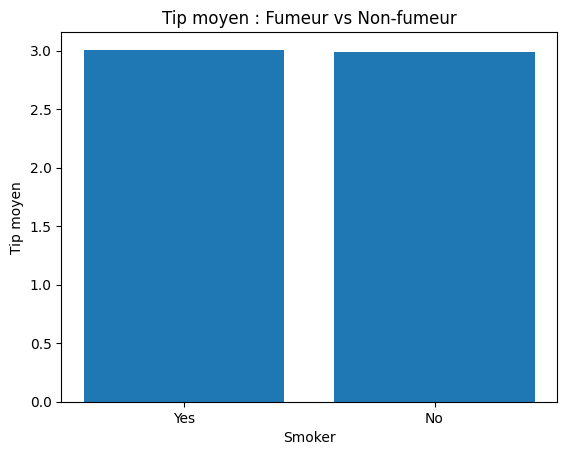

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger un dataset prêt (aucun téléchargement)
df = sns.load_dataset("tips")

# Aperçu + contrôle qualité
print("Shape (lignes, colonnes):", df.shape)
display(df.head(10))
print("\nValeurs manquantes par colonne:")
print(df.isna().sum())

# KPIs
kpis = {
    "Total tips": df["tip"].sum(),
    "Tip moyen": df["tip"].mean(),
    "Addition moyenne": df["total_bill"].mean(),
    "Nombre de transactions": len(df)
}
print("\nKPIs:")
for k, v in kpis.items():
    print(f"- {k}: {v:.2f}" if isinstance(v, float) else f"- {k}: {v}")

# Agrégations utiles
agg_day = df.groupby("day", as_index=False).agg(
    total_bill_mean=("total_bill", "mean"),
    tip_mean=("tip", "mean"),
    n=("tip", "count")
).sort_values("tip_mean", ascending=False)

display(agg_day)

# Graphique 1 : tip moyen par jour
plt.figure()
plt.plot(agg_day["day"], agg_day["tip_mean"])
plt.title("Tip moyen par jour")
plt.xlabel("Jour")
plt.ylabel("Tip moyen")
plt.show()

# Graphique 2 : tip moyen par type de client
agg_smoker = df.groupby("smoker", as_index=False).agg(tip_mean=("tip", "mean"), n=("tip", "count"))
plt.figure()
plt.bar(agg_smoker["smoker"], agg_smoker["tip_mean"])
plt.title("Tip moyen : Fumeur vs Non-fumeur")
plt.xlabel("Smoker")
plt.ylabel("Tip moyen")
plt.show()


In [4]:
# Insights rapides (texte)
best_day = agg_day.iloc[0]["day"]
best_tip = agg_day.iloc[0]["tip_mean"]

print("INSIGHTS:")
print(f"- Le jour avec le tip moyen le plus élevé est: {best_day} (~{best_tip:.2f}).")
print("- Les KPI et les graphiques peuvent servir à comprendre les comportements de pourboire par segment.")


INSIGHTS:
- Le jour avec le tip moyen le plus élevé est: Sun (~3.26).
- Les KPI et les graphiques peuvent servir à comprendre les comportements de pourboire par segment.


In [5]:
# Sauvegarde des graphiques pour le portfolio
import os

os.makedirs("assets", exist_ok=True)

# Graphique tip moyen par jour
plt.figure()
plt.plot(agg_day["day"], agg_day["tip_mean"])
plt.title("Tip moyen par jour")
plt.xlabel("Jour")
plt.ylabel("Tip moyen")
plt.savefig("assets/tip_moyen_par_jour.png", bbox_inches="tight")
plt.close()

# Graphique fumeur vs non-fumeur
plt.figure()
plt.bar(agg_smoker["smoker"], agg_smoker["tip_mean"])
plt.title("Tip moyen : Fumeur vs Non-fumeur")
plt.xlabel("Smoker")
plt.ylabel("Tip moyen")
plt.savefig("assets/tip_fumeur_vs_non_fumeur.png", bbox_inches="tight")
plt.close()

print("Graphiques exportés dans le dossier assets/")


Graphiques exportés dans le dossier assets/
